# 관계 추출 관련 논문 읽기

## 1. Position-aware Attention and Supervised Data Improve Slot Filling

* 제목 : slot filling 성능 향상을 위해 Position-aware Attention 모델을 사용했고 모델을 훈련시키기 위한 Supervised Data를 공개했음

* 데이터 제작 관련 부분은 Appendix에서 소개함

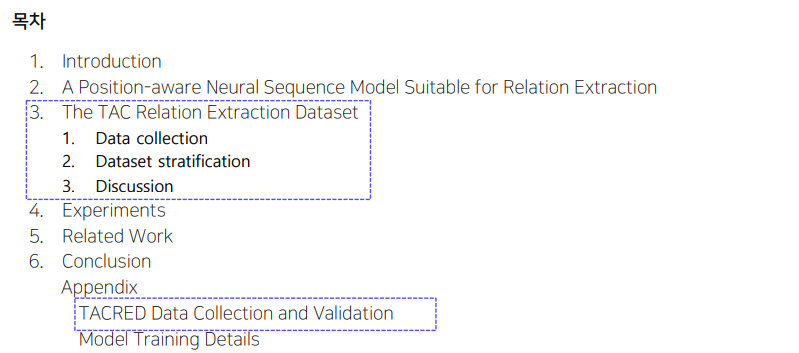

* 논문의 Abstract
  * document에서 자동적으로 knowledge base를 추출하여 이것들을 확장시키기 위한 방법론으로서 RE task 선택함
  * 과제의 주 목적이 주어진 object와 subject 사이의 관계를 채우는 것이기 때문에 RE가 아닌 slot filling이라고 한 것
  * 어떤 모델을 사용했는지, 데이터셋은 어떤 체계를 따왔는지, 실험했을 때의 f1 score와 기존보다 성능이 얼마나 향상되었는지 알려줌
  * 기존 데이터셋을 사용하는 경우 모델, 실험, 실험결과만 소개함

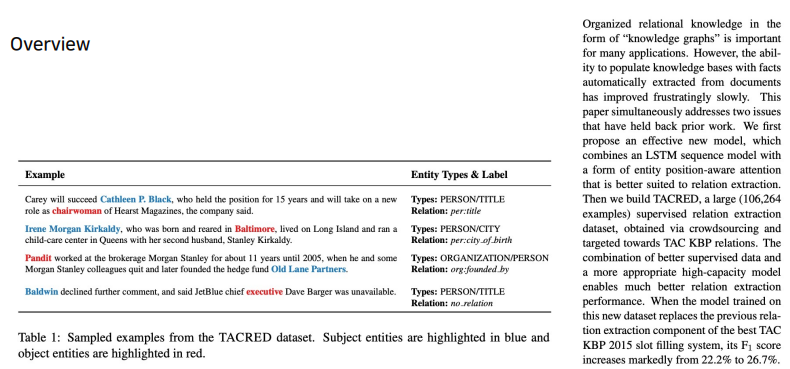

* TAC RED 사용
  * TAC RED 이전에 TAC KBP(knowledge base를 확장하기 위한 task, 2009-2015 데이터를 가지고 만듬) 데이터셋이 존재함
  * 데이터를 만든 이유
    * TAC KBP, SemEval-2010 Task 8, ACE 데이터들은 양이 적거나 task에 적합하지 않음
    * 문제를 해결하기 위해 대량의 Supervised Dataset을 공개함
      * Supervised Model : 이미 정답이 존재하는 dataset으로 학습한 model
      * Supervised Dataset : 이미 tagging이 되어 있는 dataset

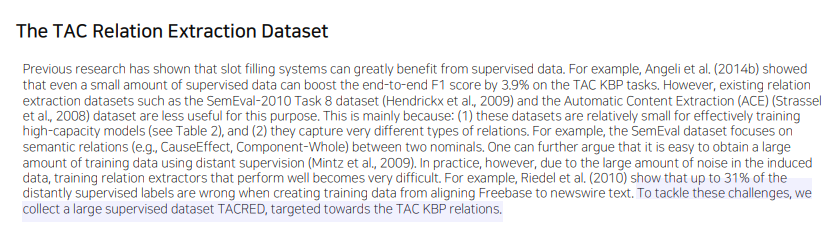

* Data collection
  * TAC RED를 구성하고 있는 문장들은 TAC KBP Challenge에서 공개된 데이터에서 가져온 것
  * 수집 방식 : Mechanical Turk를 이용해서 작업자들에게 주석 받음

* Dataset stratification
  * 데이터 구분(split을 stratification이라고 표현)
  * train(학습), dev(검증), test(평가) 데이터를 어떻게 나눴는지에 대해 설명하고 있음
  * 기존 데이터셋을 년도별로 나눔
    * train : 2009-2012, dev : 2013, test : 2014
    * 2015년도 데이터는 실제 evaluation 실험을 함
  * train, dev, test의 데이터가 상이할 경우 model의 성능이 안좋을 수 있음
    * 중간에 통계를 내어서 label들이 어떻게 분포하고 있는지, 개체명이 어떻게 분포하고 있는지, relation label이 어떻게 분포하고 있는지 확인하고 조정해야함

* Appendix에서 좀 더 자세히 다룸

* Table 2
  * 기존 dataset과 TACRED의 샘플 수와 관계 태그 수를 비교해주고 있음
  * Neg : no_relation의 비율

* Table 3
  * TACRED의 train, dev, test 각각의 example 수를 보여주고 있음

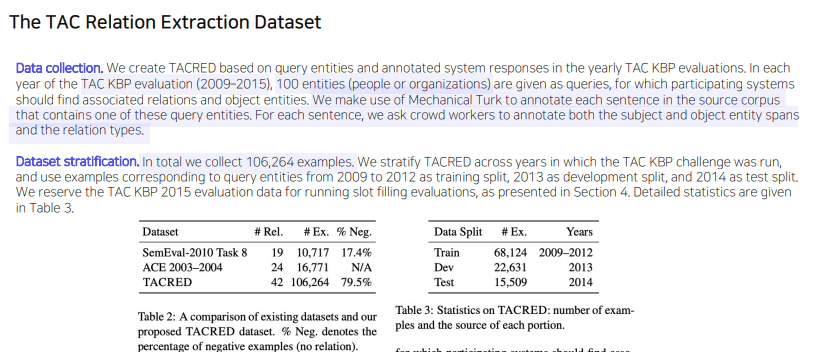

* Discussion
  * TACRED가 기존 데이터셋보다 더 나은점을 설명함
    * 더 많은 relation을 보유하고 있음
    * no_relation을 좀 더 주석하여 slot filling task에서 더 나은 성능을 보여줄 것
    * 문장 길이가 이전보다 길어짐-> 문장이 복잡해짐-> task의 난이도가 향상됨

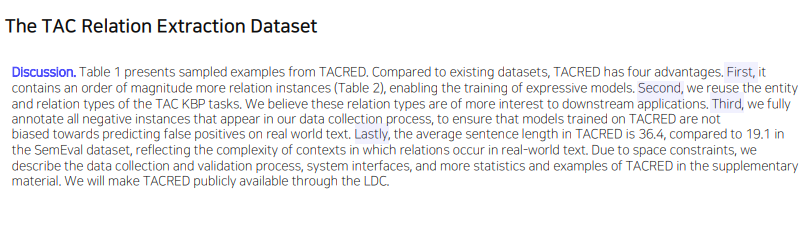

### Appendix

* Data Collection
  * LDC
    * document에 해당하는 개체명이 어떻게 나와있는지부터 시작하여 2단계에 거쳐서 tagging함
    * sentence인지 아닌지 확인
    * HIT(Human Intelligence Task) : 데이터 자체를 작업자들한테 질문을 주는 방식으로 주석작업을 설계함
  * Generated 
    * stanford에서 만들어준 관계 시스템을 가지고 개량하여 human labeling을 진행한 후 관계를 tagging함
    * 주체와 대상이 나온 상태에서 관계만 주석함

  * 최소 5%의 여유를 두고 데이터를 제작하는것이 좋음

* Data Validation
  * 작업자들의 작업을 어떻게 신뢰할 것인지를 확인하기 위해 gold set을 만듬
    * error가 25%이상인 경우 재작업을 함
  * 클라우드 소싱을 이용하는 경우에는 중간에 함정 문제를 끼워넣음
  * 300개정도 추출한 후 manually checking하여 정확도를 살펴봄

  * Inter Annotate Agreement
    * 작업자들간에 작업 일치도를 살펴보기 위해 761개의 샘플을 사용하여 5명의 작업자에게 시킴
    * Fleiss Kappa는 54.4%

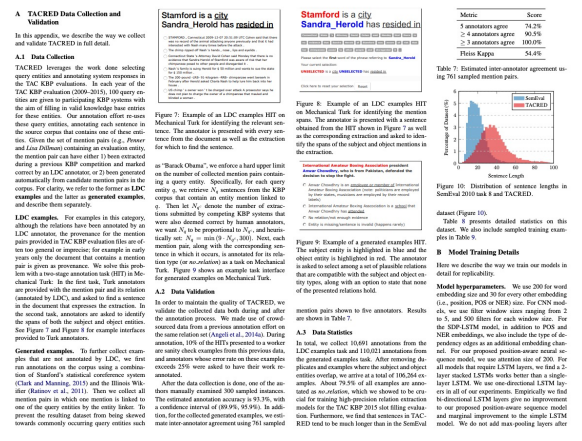

* Dataset의 issue에 관한 메모들, Dataset 전체의 relation들이 어떻게 분포하고 있는지 제시함

* 이전에 계산한 f1 score 와 중복된 데이터 제거후 계산한 f1 score 가 조금 다르지만 문제는 없음

* 몇 개를 제외하고는 1%를 차지하지 않음

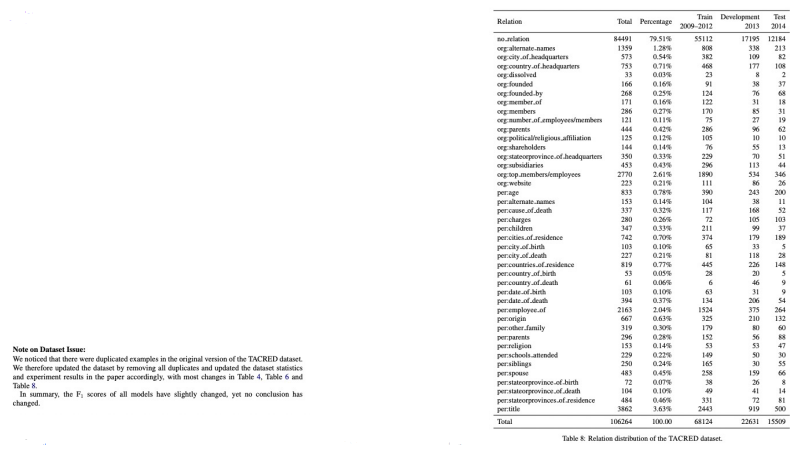

* TACRED dataset의 sample 예시

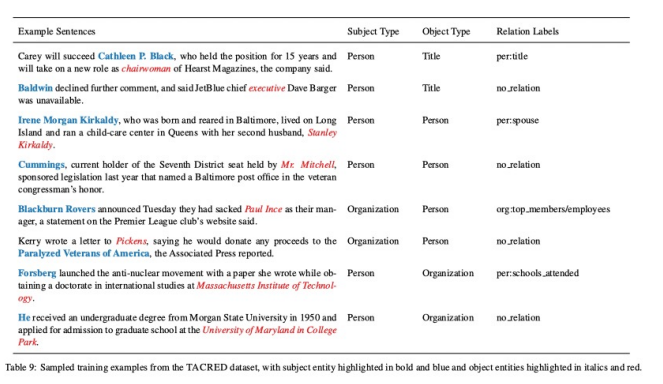

### 참고 KBP란? Knowledge Base Population(KBP)

* Knowledge Base 들을 확장하기 위한 것
  * Slotfilling
    * 두 가지 entity 의 관계를 채우는 것
  * Entity Linking
    * Knowledge Base 해당하는 linking을 해주는 것

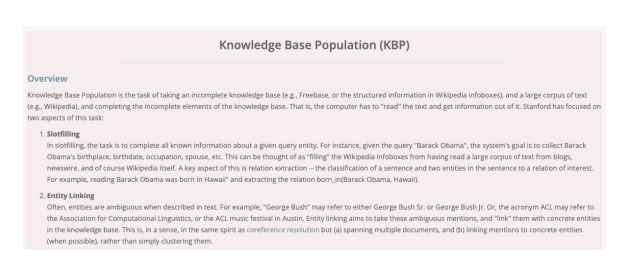

## 2. KLUE: Korean Language Understanding Evaluation

* KLUE : TACRED dataset을 벤치마킹하여 만든 dataset

* 한국어 RE 데이터를 추가 확장하는 경우 KLUE에서 제시하는 RE 데이터 제작 방법을 벤치마킹하는 것이 가장 좋음

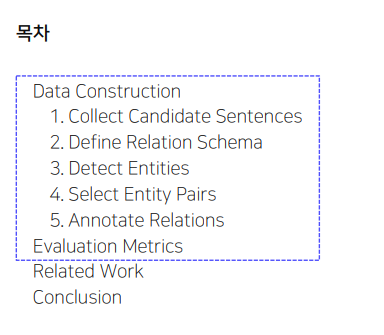

* Overview
  * RE : Text에 등장하는 두 개체간의 관계를 판별하는 것
  * 두 개체 : subject entity, object entity
  * RE를 single sentence classification task로 본다고 정의함
  * RE의 목적 : relation triplet(subject entity, relation, object entity)을 만드는 것
  * 30개의 relation class를 사용하고 있음
  * 평가에 micro F1 score를 사용함(no_relation 제외)

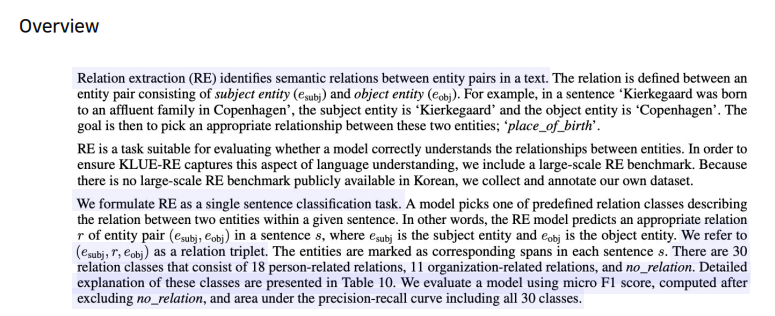

* Data Construction
  * Collect Candidate Sentences
    * 주석의 대상이 될 후보 문장들을 어디서 가져왔는지에 대한 설명
    * WIKIPEDIA, WIKITREE(뉴스기사, 언론기사), POLICY(뉴스기사, 언론기사)
      * 문어성이 짙은 데이터
    * KSS(Korean Sentence Splitter) library를 사용해서 문장을 나누는 처리를 함
    * Korean hate speech dataset으로 훈련된 classifier를 사용하여 hate speech를 제거함
  * Deine Relation Schema
    * relation schema를 어떻게 정의했는지에 대한 설명
    * TAC-KBP schema를 참고하였지만 한국어 특성에 따라 달라진 relation schema이 있음

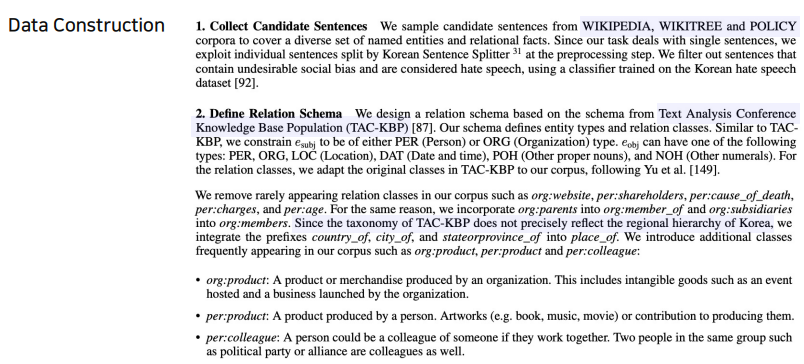

* 최종적으로 결정된 Data Schema

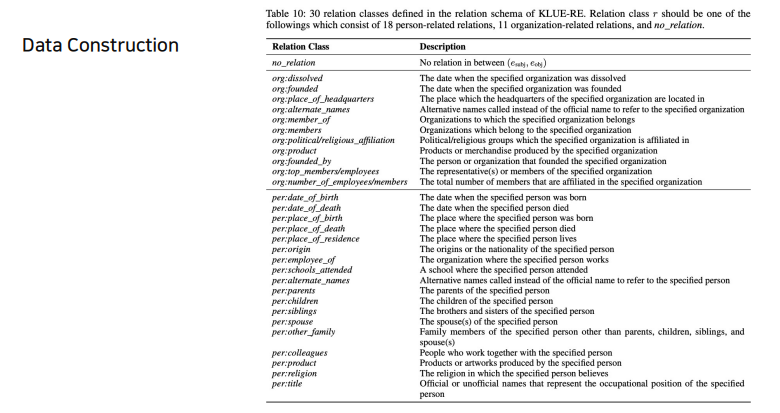

* Data Construction
  * Detect Entities
    * ELECTRA를 기반으로 fine-tuning한 NER 모델을 가지고 entity를 주석하는 작업을 함
  
  * Select Entity Pairs
    * entity pair를 어떻게 선택할 것인지 설명하고 있음
    * Detect Entities에서 정의한 두 가지 entity를 가지고 관계를 어떻게 정의할 것인지 설명하고 있음
    * KB-based sampling
      * Knowledge base를 기반으로 한 sampling
      * 나무위키와 위키피디아의 infobox 정보에서 KB를 만들고 이를 바탕으로 데이터를 구축함
    * uniform sampling
      * real word 데이터(no_relation 데이터 포함)를 포함하기 위해(KB와 독립적으로 만들기 위해) 임의로 sampling을 진행하여 대상 문장들을 만듬

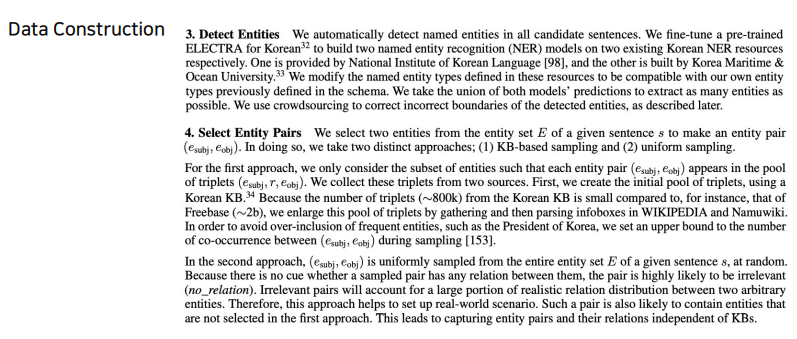

* Data Construction
  * Annotate Relations
    * 두 개체간의 관계를 주석하는 작업에 대해 설명하고 있음
    * DeepNatural 이라는 클라우드소싱 플랫폼을 사용하여 작업함
    * 5개 중 4개 이상의 문제를 맞춘 163명의 작업자들을 선별하여 작업시킴
    * gold label을 어떻게 만들었는지 설명하고 있음

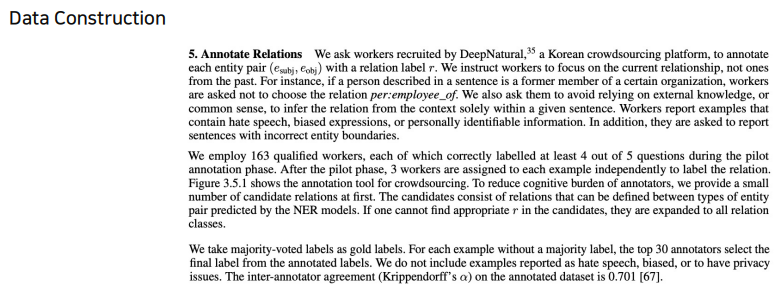

* subject가 될 개체명과 object가 될 개체명을 보여주고 둘 사이의 관계를 선택하도록 되어 있음
* 주석대상이 아닌경우 제외할 수 있는 옵션 추가되어 있음
  * 데이터 자체에 error가 있는 경우
    * 혐오, 편견, 비윤리적 표현이 포함되어 있는 경우
    * 개인정보 보호 이슈가 있는 경우

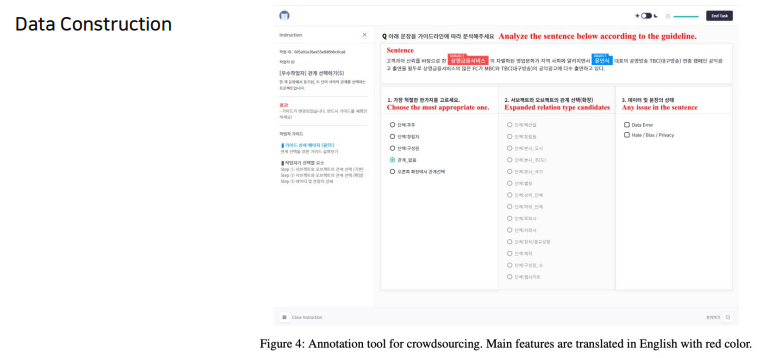

* 각 데이터가 train, dev, test에서 어떤 비율로 가지고 있는지 보여주고 있음
  * dev와 test에서 no_relation의 비율을 상대적으로 늘리다보니 train에서 줄어든 것을 볼 수 있음

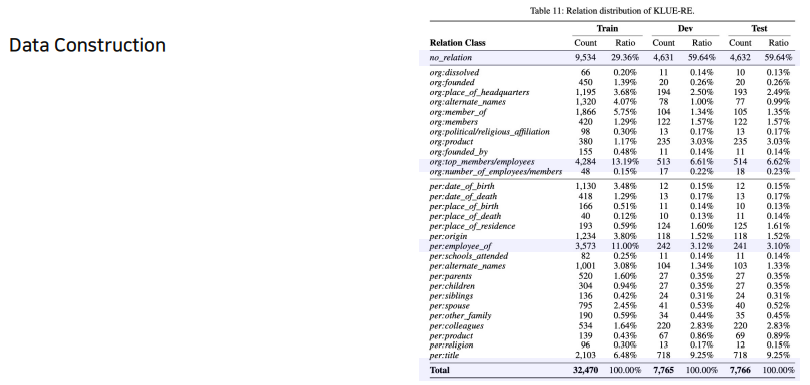

* Evaluation Metrics
  * model을 통해서 평가하는 지표
  * micro F1 score
  * AUPRC(area under the precision-recall curve)

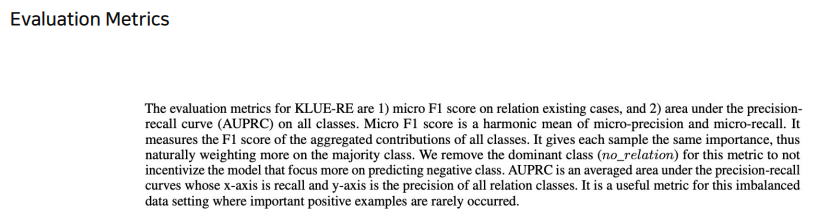